## **1ST PHASE**


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Input shape and number of classes has been defined
input_shape = (224, 224, 3)
num_classes = 2
#ImageDataGenerator for training and test data has been defined
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
# Training and test data has been loaded
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/minidata/train',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle = False)
test_data =test_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/minidata/test',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle = False)


Found 448 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
# Loading pre-trained models
resnet = ResNet152V2(weights='imagenet', include_top=False, input_shape=input_shape)
densenet = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
inception_resnet = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freezing the pre-trained models
for model in [resnet, densenet, inception_resnet, mobilenet]:
    model.trainable = False



9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
#Applying GlobalAveragePooling to the pre-trained models and concatening the outputs pf pre-trained model

inputs = tf.keras.Input(shape=input_shape)
x1 = tf.keras.layers.GlobalAveragePooling2D()(resnet(inputs))
x2 = tf.keras.layers.GlobalAveragePooling2D()(densenet(inputs))
x3 = tf.keras.layers.GlobalAveragePooling2D()(inception_resnet(inputs))
x4 = tf.keras.layers.GlobalAveragePooling2D()(mobilenet(inputs))
x = tf.keras.layers.Concatenate()([x1, x2, x3, x4])

#Fully connected layer and creating the final model

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
tf.random.set_seed(42)
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [ ]:
# Training the model

history = model.fit(train_data,
          epochs=10)



Epoch 1/10
14/14 [==============================] - 139s 6s/step - loss: 1.5094 - accuracy: 0.6585
Epoch 2/10
14/14 [==============================] - 10s 712ms/step - loss: 1.3816 - accuracy: 0.7076
Epoch 3/10
14/14 [==============================] - 9s 601ms/step - loss: 1.0460 - accuracy: 0.5491
Epoch 4/10
14/14 [==============================] - 10s 716ms/step - loss: 0.5090 - accuracy: 0.7634
Epoch 5/10
14/14 [==============================] - 10s 722ms/step - loss: 0.4007 - accuracy: 0.8259
Epoch 6/10
14/14 [==============================] - 10s 669ms/step - loss: 0.4915 - accuracy: 0.7835
Epoch 7/10
14/14 [==============================] - 10s 641ms/step - loss: 0.4553 - accuracy: 0.7835
Epoch 8/10
14/14 [==============================] - 10s 714ms/step - loss: 0.3902 - accuracy: 0.8147
Epoch 9/10
14/14 [==============================] - 11s 736ms/step - loss: 0.4893 - accuracy: 0.7991
Epoch 10/10
14/14 [==============================] - 10s 661ms/step - loss: 0.3532 - accuracy:

In [ ]:
# Defining threshold for entropy
threshold = 0.5

# Generating predictions for test data
predictions = model.predict(test_data)



4/4 [==============================] - 47s 12s/step


In [ ]:
# Checking if entropy is less than threshold and print class label if it is
no_predictions=[]
no_filepaths=[]
for j,pred in enumerate(predictions):
    entropy = -sum([p * tf.math.log(p) for p in pred])
    if entropy < threshold:
        if pred[0] > pred[1]:
            print('YES (WAY 1) - Benign')
        else:
            print('YES (WAY 2) - Malignant')
    else:
        print('NO (WAY 3)')
        no_predictions.append(pred)
        no_filepaths.append(test_data.filepaths[j])

NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
YES (WAY 1) - Benign
NO (WAY 3)
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
YES (WAY 1) - Benign
NO (WAY 3)
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
YES (WAY 1) - Benign
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
YES (WAY 2) - Malignant
YES (WAY 2) - Malignant
NO (WAY 3)
YES (WA

In [ ]:
# Displaying the accuracy by evaluating the model
loss,accuracy=model.evaluate(test_data)

4/4 [==============================] - 13s 464ms/step - loss: 0.4447 - accuracy: 0.8200


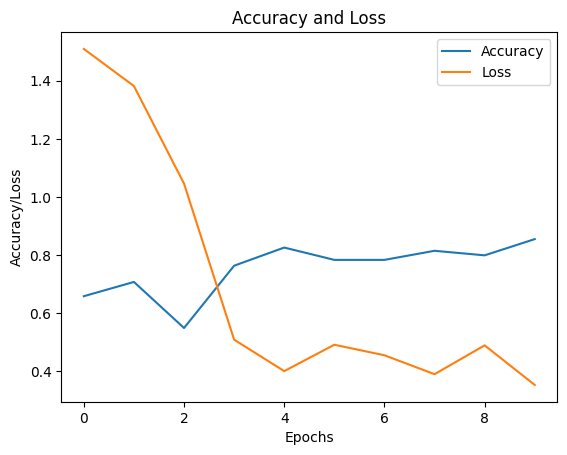

In [ ]:
# Plotting the loss and Accuracy
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Accuracy and Loss')
plt.legend()
plt.show()

In [ ]:
accuracy *= 100
print("Accuracy = %.2f"%accuracy)

Accuracy = 82.00


Accuracy: 82.00%
F1 Score: 0.84
Area Under Curve (AUC): 0.88


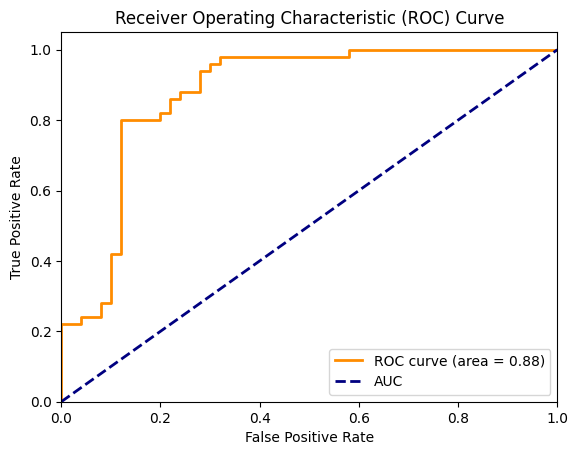

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

y_true = test_data.classes
y_pred = np.argmax(predictions,axis=1)

# Calculating Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculating F1 score
f1 = f1_score(y_true, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Calculating Area Under Curve (AUC)
probs = predictions
auc_score = roc_auc_score(y_true, probs[:, 1])
print("Area Under Curve (AUC): {:.2f}".format(auc_score))

fpr, tpr, thresholds = roc_curve(y_true, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='AUC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Displaying a random sample image from test data
import random
import matplotlib.image as mpimg
import os
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img


Image shape: (224, 224, 3)


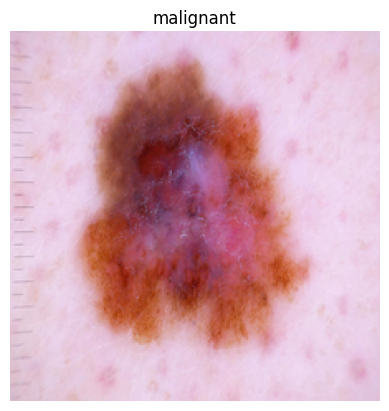

In [ ]:
 img=view_random_image('/content/drive/MyDrive/archive/minidata/test/','malignant')

## **2ND PHASE**

In [ ]:
import pandas as pd

no_df = pd.DataFrame({'filepath': no_filepaths})
no_df

,filepath
0,/content/drive/MyDrive/archive/minidata/test/b...
1,/content/drive/MyDrive/archive/minidata/test/b...
2,/content/drive/MyDrive/archive/minidata/test/b...
3,/content/drive/MyDrive/archive/minidata/test/b...
4,/content/drive/MyDrive/archive/minidata/test/b...
5,/content/drive/MyDrive/archive/minidata/test/b...
6,/content/drive/MyDrive/archive/minidata/test/b...
7,/content/drive/MyDrive/archive/minidata/test/b...
8,/content/drive/MyDrive/archive/minidata/test/b...
9,/content/drive/MyDrive/archive/minidata/test/b...


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Input shape and number of classes has been defined
input_shape = (224, 224, 3)
num_classes = 2
#ImageDataGenerator for training and test data has been defined
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
no_datagen = ImageDataGenerator(rescale=1./255)
# Training and test data has been loaded
train_data = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/minidata/train',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle = False)
test_data = no_datagen.flow_from_dataframe(
    no_df,
    x_col='filepath',
    target_size=input_shape[:2],
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 448 images belonging to 2 classes.
Found 29 validated image filenames.


In [ ]:
   # Loading pre-trained models
resnet = ResNet152V2(weights='imagenet', include_top=False, input_shape=input_shape)
densenet = DenseNet201(weights='imagenet', include_top=False, input_shape=input_shape)
inception_resnet = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freezing the pre-trained models
for model in [resnet, densenet, inception_resnet]:
    model.trainable = False



In [ ]:
def get_mc_dropout_model(inputs):
    resnet_out = tf.keras.layers.GlobalAveragePooling2D()(resnet(inputs))
    densenet_out = tf.keras.layers.GlobalAveragePooling2D()(densenet(inputs))
    inception_resnet_out = tf.keras.layers.GlobalAveragePooling2D()(inception_resnet(inputs))

    x = tf.keras.layers.Concatenate()([resnet_out, densenet_out, inception_resnet_out])
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
inputs = tf.keras.Input(shape=input_shape)
model = get_mc_dropout_model(inputs)

tf.random.set_seed(42)
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy'])


In [ ]:
# Training the model

history = model.fit(train_data,epochs=10,steps_per_epoch=len(train_data))



Epoch 1/10
14/14 [==============================] - 46s 708ms/step - loss: 2.7898 - accuracy: 0.5446
Epoch 2/10
14/14 [==============================] - 10s 670ms/step - loss: 2.7953 - accuracy: 0.5491
Epoch 3/10
14/14 [==============================] - 9s 614ms/step - loss: 1.2288 - accuracy: 0.5045
Epoch 4/10
14/14 [==============================] - 10s 700ms/step - loss: 0.7940 - accuracy: 0.6384
Epoch 5/10
14/14 [==============================] - 10s 703ms/step - loss: 0.8813 - accuracy: 0.6071
Epoch 6/10
14/14 [==============================] - 9s 602ms/step - loss: 0.7395 - accuracy: 0.6719
Epoch 7/10
14/14 [==============================] - 10s 686ms/step - loss: 0.5559 - accuracy: 0.7411
Epoch 8/10
14/14 [==============================] - 11s 749ms/step - loss: 0.4856 - accuracy: 0.7902
Epoch 9/10
14/14 [==============================] - 9s 606ms/step - loss: 0.6933 - accuracy: 0.6987
Epoch 10/10
14/14 [==============================] - 10s 718ms/step - loss: 0.4555 - accuracy:

In [ ]:
threshold = 0.5
predictions = model.predict(test_data)

1/1 [==============================] - 10s 10s/step


In [ ]:
# Checking if entropy is less than threshold and print class label if it is
for pred in predictions:
    entropy = -sum([p * tf.math.log(p) for p in pred])
    if np.any(entropy < threshold):
        if pred[0] > pred[1]:
            print('YES (WAY 1) - Benign')
        else:
            print('YES (WAY 2) - Malignant')
    else:
        print('NO (WAY 3)')

YES (WAY 1) - Benign
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
NO (WAY 3)
YES (WAY 1) - Benign
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)
YES (WAY 2) - Malignant
NO (WAY 3)
YES (WAY 2) - Malignant
NO (WAY 3)
NO (WAY 3)
NO (WAY 3)


In [ ]:
# Displaying the accuracy by evaluating the model
loss,accuracy=model.evaluate(test_data)

1/1 [==============================] - 10s 10s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved_models/ModelD1.h5')

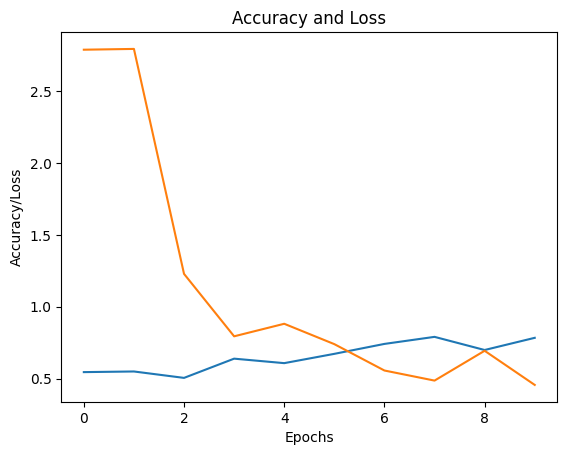

In [ ]:
# Plotting the loss and Accuracy
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['loss'],label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.title('Accuracy and Loss')
plt.show()

In [ ]:
accuracy *= 100
print("Accuracy = %.2f"%accuracy)

Accuracy = 0.00


In [ ]:
#Displaying a random sample image from test data
import random
import matplotlib.image as mpimg
import os
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape: {img.shape}")
  return img

Image shape: (224, 224, 3)


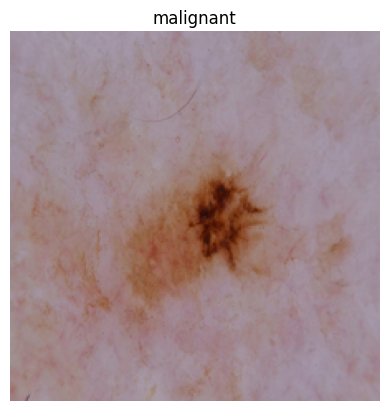

In [ ]:
img=view_random_image('/content/drive/MyDrive/archive/minidata/test/','malignant')

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

y_true = test_data.classes
y_pred = np.argmax(predictions,axis=1)

# Calculating Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculating F1 score
f1 = f1_score(y_true, y_pred)
print("F1 Score: {:.2f}".format(f1))

# Calculating Area Under Curve (AUC)
probs = predictions
auc_score = roc_auc_score(y_true, probs[:, 1])
print("Area Under Curve (AUC): {:.2f}".format(auc_score))

fpr, tpr, thresholds = roc_curve(y_true, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',label='AUC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

AttributeError: ignored